In [101]:
from benchmark_nbse import  get_nbse_mols, get_nbse_smiles
from rdkit.Chem import rdFMCS 
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import rdMolDraw2D
import os

nbse_dir = '../nbse'

In [102]:
directory = os.path.join(nbse_dir, '1d0s', 'ligands')

smiles = get_nbse_smiles(directory)

In [103]:
def draw_match(mol, query):
    hit_ats = list(mol.GetSubstructMatch(query))
    print(hit_ats)
    hit_bonds = []
    for bond in query.GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]
        hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

    d = rdMolDraw2D.MolDraw2DSVG(1000, 1000) # or MolDraw2DCairo to get PNGs
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightBonds=hit_bonds, highlightAtoms=hit_ats)
    display(mol)

In [104]:
mols = [Chem.MolFromSmiles(s) for (s, _) in smiles]

In [110]:
mcs: rdFMCS.MCSResult = rdFMCS.FindMCS(mols)

In [106]:
first: Chem.Mol = mols[0]

In [107]:
second: Chem.Mol = mols[1]

[2, 1, 4, 17, 5, 18]


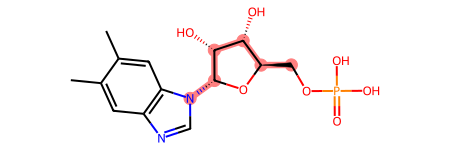

In [108]:
draw_match(first, mcs.queryMol)

[0, 1, 8, 3, 9, 4]


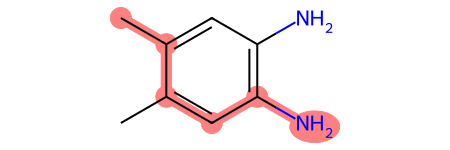

In [109]:
draw_match(second, mcs.queryMol)

In [113]:

from rdkit.Chem.Draw import rdDepictor
def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')



In [117]:
from IPython.display import SVG
import pyperclip
    pyperclip.copy(moltosvg(mols[0]X